### Assignment-2 (can't take 10,000 range as sample data is only till 1300)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()

In [3]:
print("Keys of dataset: {}".format(dataset.keys()))

Keys of dataset: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
#print(iris_dataset['DESCR'])

In [5]:
print(dataset['target_names'])

[0 1 2 3 4 5 6 7 8 9]


In [6]:
print(dataset['target_names'])
print(type(dataset['data']))

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], 
                                                    random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import accuracy_score 

In [10]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(accuracy_score(y_test,y_pred)))

Test set predictions:
 0.9933333333333333


### Linear search for tuning 

highest accuracy :0.9955555555555555  where k:4
Time:  17.490559268000084


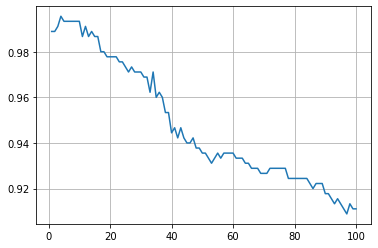

In [11]:
import timeit

start = timeit.default_timer()

scores= []
k =np.arange(1,101)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print("Test set predictions:\n {}".format(accuracy_score(y_test,y_pred)))
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(k,scores)
plt.grid()
terry = np.asarray(scores)
print("highest accuracy :{}".format(terry.max()),
      " where k:{}".format(terry.argmax()+1,))

stop = timeit.default_timer()

print('Time: ', stop - start)  

## Function for Calculating KNN

In [12]:
def knn_value(w):
    knn = KNeighborsClassifier(n_neighbors=w)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print("Test set predictions:\n {}".format(accuracy_score(y_test,y_pred)))
    return accuracy_score(y_test,y_pred)

In [13]:
import math
math.floor(3.5)
math.ceil(3.5)

4

## Function for Binary search

In [14]:

def binsearch(a,b):
    m = (a+b)/2
    m = math.floor(m)
    knn = KNeighborsClassifier(n_neighbors=m)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    
    if len(range(a,b+1)) > 3 : 
        if knn_value(m)+knn_value(a) >= knn_value(m+1) + knn_value(b):
            print(a,m)
            #print(b)
            binsearch(a,m)
        else : 
            print(m,b)
            binsearch(m,b)
    else:
        print("max range :{}".format(a),"max value:{}".format(knn_value(a)))
            
    
    
    

## TEST for Binary Search function

In [15]:
start = timeit.default_timer()
binsearch(1,1000)
stop = timeit.default_timer()
print('Time: ', stop - start)  

0.7555555555555555
1 500
0.8666666666666667
1 250
0.8933333333333333
1 125
0.9333333333333333
1 63
0.9688888888888889
1 32
0.9866666666666667
1 16
0.9933333333333333
1 8
0.9955555555555555
4 8
0.9933333333333333
4 6
0.9933333333333333
max range :4 max value:0.9955555555555555
Time:  8.250109769999995


## Linear search took 16 secs whereas Binary took 7.9

## Hybrid Search

In [16]:
def HybridSearch(a,b):
    alpha = [10**k for k in range(0,4)]
    alpha = np.asarray(alpha)
    #print(alpha[1])
    range_detail = [(i,knn_value(i)) for i in alpha]
    range_sorted = sorted(range_detail,key = lambda r :r[1])
    range_value = [i for i,j in range_sorted[-2:]]
   
    binsearch(range_value[0],range_value[1]) 

## TEST: Hybrid Search(Took 1.18 secs)

In [17]:
start = timeit.default_timer()
HybridSearch(1,1000)
stop = timeit.default_timer()
print('Time: ', stop - start) 

0.9933333333333333
5 10
0.9933333333333333
5 7
0.9933333333333333
max range :5 max value:0.9933333333333333
Time:  2.5133516670000517


## Random Search

In [158]:
np.random.seed(10)
def RandSearch(a,b,c):
    Test_values = list(np.random.randint(a,b,c))
    
    j = list(map(lambda v:(v,knn_value(v)),Test_values))
    sort_scores = sorted(j,key = lambda r:r[1])
    #print(sort_scores[-1])
    x,y = sort_scores[-1]
    #print(x)
    #print("accuracy obtained:{}".format(y),"at K =:{}".format(x))
    return y

In [189]:
Numb_iter = [1,10,20,30,40,50,60,70,80,90,100]
time = []
score_graph =[]
Scores =[]
#Scores = [RandSearch(1,1000,j) for j in Numb_iter]
for i in Numb_iter:
    start = timeit.default_timer()
    #Scores = [(j,RandSearch(1,1000,j)) for j in Numb_iter]
    Scores.append(RandSearch(1,1000,i))
    stop = timeit.default_timer() 
    print('Time: ', stop - start) 
    score_graph.append(i)
    w = stop - start
    time.append(w)

Time:  0.15663897600097698
Time:  1.0963002890002826
Time:  1.9812327009985893
Time:  5.468700799001454
Time:  7.387742630000503
Time:  9.709560745999624
Time:  12.10132064299978
Time:  13.641312248000759
Time:  15.94536624399916
Time:  17.522686984000757
Time:  20.21194550400105


In [186]:
#sorted_score=sorted(Scores,key=lambda r: r[1])
#score_graph = []
#for k,j in sorted_score:
  # score_graph.append(k)


## The Graphs representing the Random search
### Time increasing as Iterations does, whereas Accuracy Saturates after 50

Text(0.5, 0, 'No. of iterations')

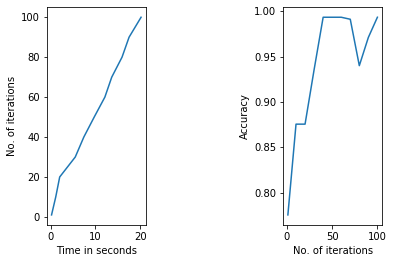

In [199]:
plt.subplot(1,3,1)
plt.plot(time,score_graph)
plt.xlabel("Time in seconds")
plt.ylabel("No. of iterations")
plt.subplot(1,3,3)
plt.plot(score_graph,Scores)
plt.ylabel("Accuracy")
plt.xlabel("No. of iterations")